# TensorFlow: classificação básica


In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-10-25 20:02:31.872151: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-25 20:02:31.898820: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-25 20:02:31.898847: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-25 20:02:31.898870: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-25 20:02:31.904212: I tensorflow/core/platform/cpu_feature_g

2.14.0


## Importe a base de dados Fashion MNIST


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Pré-processe os dados


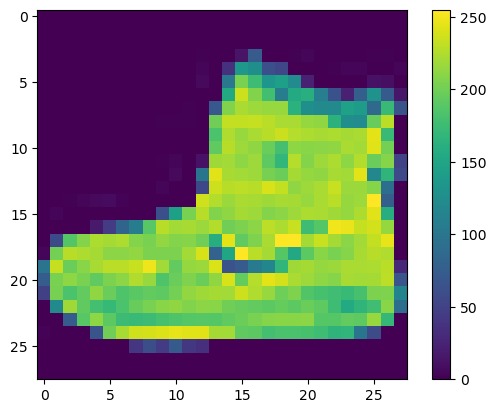

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

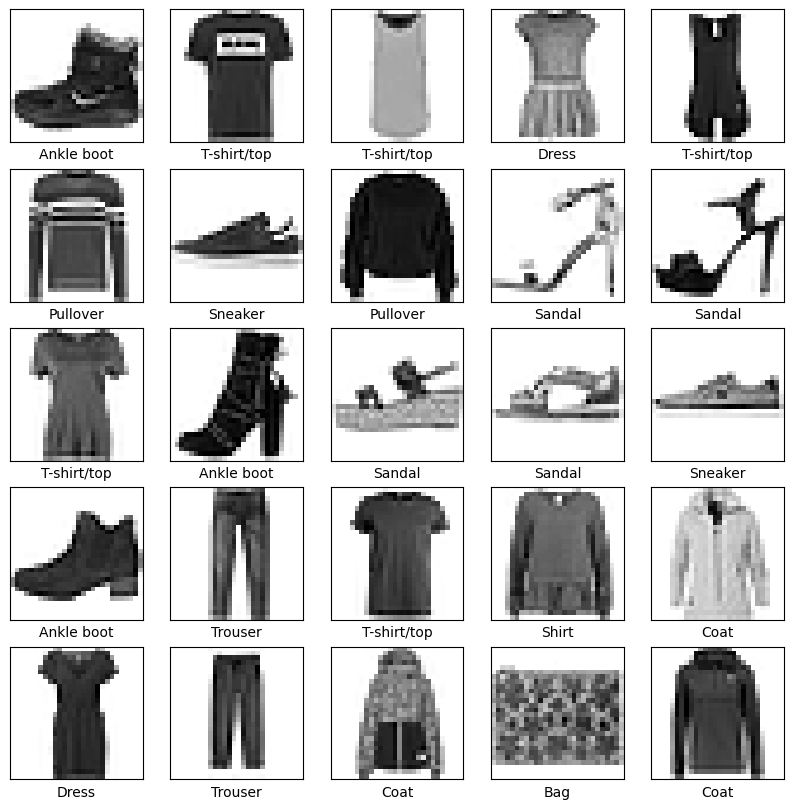

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## Construindo o modelo


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2023-10-25 20:02:34.059829: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2023-10-25 20:02:34.059869: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: cayoesn-Dell-G15-5520
2023-10-25 20:02:34.059876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: cayoesn-Dell-G15-5520
2023-10-25 20:02:34.059980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.113.1
2023-10-25 20:02:34.060001: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 545.23.6
2023-10-25 20:02:34.060007: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 545.23.6 does not match DSO version 535.113.1 -- cannot find working devices in this conf

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treine o modelo


In [14]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4957 - accuracy: 0.8252
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3712 - accuracy: 0.8658
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3328 - accuracy: 0.8781
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3094 - accuracy: 0.8856
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2918 - accuracy: 0.8929
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2769 - accuracy: 0.8967
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2651 - accuracy: 0.9022
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9047
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2456 - accuracy: 0.9093
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3284 - accuracy: 0.8847 - 281ms/epoch - 897us/step

Test accuracy: 0.8847000002861023


## Faça predições


In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 759us/step


In [17]:
predictions[0]

array([4.4723690e-11, 2.2210539e-12, 9.4223418e-10, 3.9744586e-17,
       4.0914223e-11, 3.0909232e-05, 2.2657256e-11, 1.3653174e-03,
       9.3081862e-09, 9.9860376e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

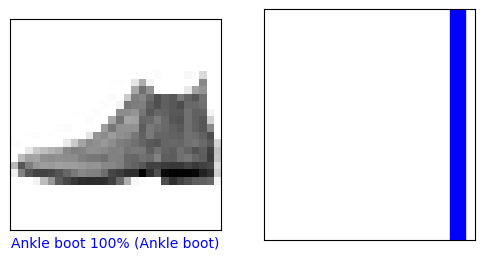

In [21]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions,  test_labels)
plt.show()

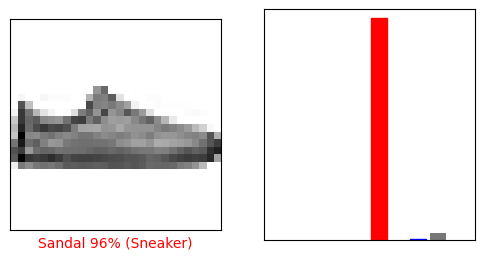

In [22]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions,  test_labels)
plt.show()

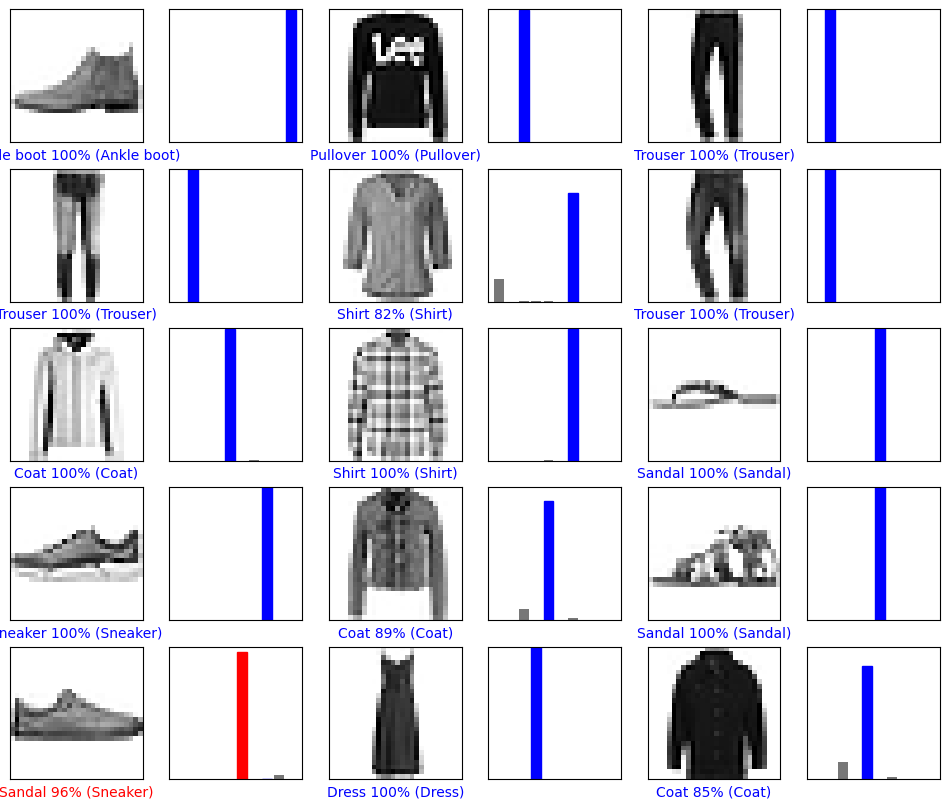

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [24]:
img = test_images[0]

print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 11ms/step
[[4.4723690e-11 2.2210623e-12 9.4222874e-10 3.9744434e-17 4.0914147e-11
  3.0909203e-05 2.2657256e-11 1.3653160e-03 9.3081862e-09 9.9860376e-01]]


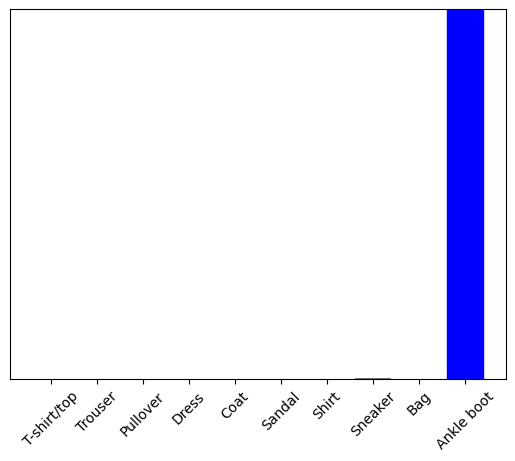

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

9